In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
sns.set()
%matplotlib inline

In [66]:
df = pd.read_csv('/Climate_change_data/GlobalLandTemperaturesByMajorCity.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


### Data Cleaning

In [67]:
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [68]:
df = df.dropna()
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [69]:
df.shape

(228175, 7)

In [70]:
df.City.unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [71]:
df.City.unique().shape

(100,)

In [72]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [73]:
df.dt.unique().shape

(3167,)

### Formatting date and time column

In [74]:
def process_date_columns(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df[['year', 'month', 'day']] = df[date_column].dt.strftime('%Y-%m-%d').str.split('-', expand=True)

    return df

df1 = process_date_columns(df, 'dt')
df1

C:\Users\Adekunle Habeeb\AppData\Local\Temp\ipykernel_16480\1654179114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
C:\Users\Adekunle Habeeb\AppData\Local\Temp\ipykernel_16480\1654179114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['year', 'month', 'day']] = df[date_column].dt.strftime('%Y-%m-%d').str.split('-', expand=True)
C:\Users\Adekunle Habeeb\AppData\Local\Temp\ipykernel_16480\1654179114.py:3: SettingWithCopyWarning:

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02,01
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03,01
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04,01
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05,01
...,...,...,...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E,2013,04,01
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,2013,05,01
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,2013,06,01
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,2013,07,01


In [75]:
df1 = df1.drop(['dt'], axis='columns')
df1

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,day
0,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01
1,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02,01
2,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03,01
3,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04,01
4,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05,01
...,...,...,...,...,...,...,...,...,...
239171,12.563,1.823,Xian,China,34.56N,108.97E,2013,04,01
239172,18.979,0.807,Xian,China,34.56N,108.97E,2013,05,01
239173,23.522,0.647,Xian,China,34.56N,108.97E,2013,06,01
239174,25.251,1.042,Xian,China,34.56N,108.97E,2013,07,01


In [76]:
df2 = df1.copy()
df2 = df2.drop(['AverageTemperatureUncertainty'], axis='columns')
df2

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02,01
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03,01
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04,01
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05,01
...,...,...,...,...,...,...,...,...
239171,12.563,Xian,China,34.56N,108.97E,2013,04,01
239172,18.979,Xian,China,34.56N,108.97E,2013,05,01
239173,23.522,Xian,China,34.56N,108.97E,2013,06,01
239174,25.251,Xian,China,34.56N,108.97E,2013,07,01


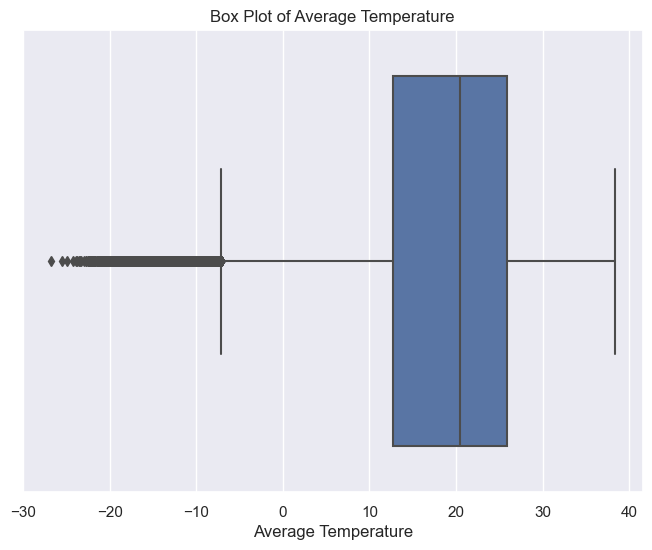

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['AverageTemperature'])
plt.title('Box Plot of Average Temperature')
plt.xlabel('Average Temperature')
plt.show()

In [78]:
_, mean, std, *_ = df.AverageTemperature.describe()

In [79]:
mean

18.125968852854168

In [80]:
std

10.024799710484947

### Outlier Detection in Average Temeprature column

In [81]:
df2['zscore'] = (df2.AverageTemperature-df2.AverageTemperature.mean())/df2.AverageTemperature.std()
df2.head()

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day,zscore
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01,0.855681
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02,01,0.928500
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03,01,0.995035
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04,01,0.799421
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05,01,0.728297


In [82]:
outliers_z = df2[(df2.zscore<-3) | (df2.zscore>3)]
outliers_z.sample(10)

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day,zscore
82994,-16.316,Harbin,China,45.81N,125.77E,1972,12,01,-3.435677
81868,-15.826,Harbin,China,45.81N,125.77E,1879,02,01,-3.386798
47330,-14.812,Changchun,China,44.20N,125.22E,1844,12,01,-3.285649
47799,-16.364,Changchun,China,44.20N,125.22E,1884,01,01,-3.440465
81254,-16.590,Harbin,China,45.81N,125.77E,1827,12,01,-3.463009
48087,-19.747,Changchun,China,44.20N,125.22E,1908,01,01,-3.777928
48135,-14.229,Changchun,China,44.20N,125.22E,1912,01,01,-3.227493
81986,-14.729,Harbin,China,45.81N,125.77E,1888,12,01,-3.277369
47775,-14.883,Changchun,China,44.20N,125.22E,1882,01,01,-3.292731
48338,-14.545,Changchun,China,44.20N,125.22E,1928,12,01,-3.259015


In [83]:
outliers_z.shape

(1621, 9)

In [84]:
df3 = df2[(df2.zscore>-3)&(df2.zscore<3)]
df3.shape

(226554, 9)

In [85]:
df2.shape[0] - df3.shape[0]

1621

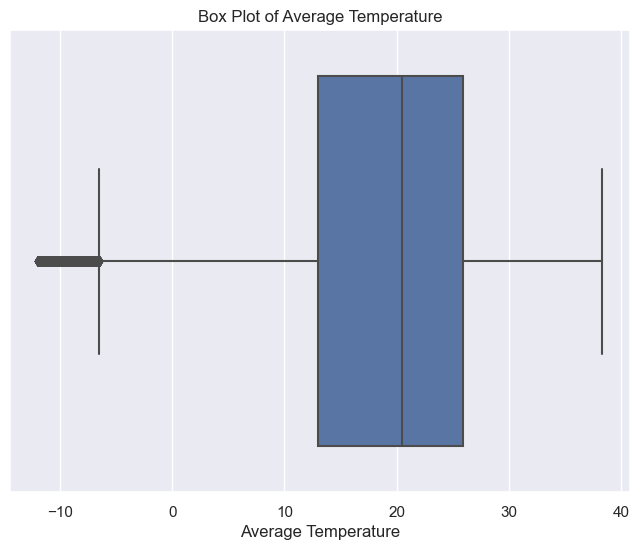

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df3['AverageTemperature'])
plt.title('Box Plot of Average Temperature')
plt.xlabel('Average Temperature')
plt.show()

In [87]:
df3

,AverageTemperature,City,Country,Latitude,Longitude,year,month,day,zscore
0,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,01,01,0.855681
1,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,02,01,0.928500
2,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,03,01,0.995035
3,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,04,01,0.799421
4,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,05,01,0.728297
...,...,...,...,...,...,...,...,...,...
239171,12.563,Xian,China,34.56N,108.97E,2013,04,01,-0.554921
239172,18.979,Xian,China,34.56N,108.97E,2013,05,01,0.085092
239173,23.522,Xian,China,34.56N,108.97E,2013,06,01,0.538268
239174,25.251,Xian,China,34.56N,108.97E,2013,07,01,0.710740


In [88]:
df3.day.unique()

array(['01'], dtype=object)

In [89]:
df4 = df3.drop(['Country','Latitude', 'Longitude', 'zscore', 'day'], axis='columns')
df4

,AverageTemperature,City,year,month
0,26.704,Abidjan,1849,01
1,27.434,Abidjan,1849,02
2,28.101,Abidjan,1849,03
3,26.140,Abidjan,1849,04
4,25.427,Abidjan,1849,05
...,...,...,...,...
239171,12.563,Xian,2013,04
239172,18.979,Xian,2013,05
239173,23.522,Xian,2013,06
239174,25.251,Xian,2013,07


In [90]:
# df4['Month'] = df4['month'].apply(lambda x: calendar.month_name[int(x)])
# df4

In [91]:
df4 = df4.rename(columns={'City': 'city'})
df4

,AverageTemperature,city,year,month
0,26.704,Abidjan,1849,01
1,27.434,Abidjan,1849,02
2,28.101,Abidjan,1849,03
3,26.140,Abidjan,1849,04
4,25.427,Abidjan,1849,05
...,...,...,...,...
239171,12.563,Xian,2013,04
239172,18.979,Xian,2013,05
239173,23.522,Xian,2013,06
239174,25.251,Xian,2013,07


In [92]:
city_stats = df4['city'].value_counts()
city_stats

Rome             3166
London           3166
Istanbul         3166
Berlin           3166
Madrid           3166
                 ... 
Addis Abeba      1679
Nairobi          1678
Fortaleza        1659
Dar Es Salaam    1586
Lima             1521
Name: city, Length: 100, dtype: int64

In [93]:
city_stats.values.sum()

226554

In [94]:
temp_by_cities = df4.groupby('city')['AverageTemperature'].mean().sort_values(ascending=False).reset_index()
temp_by_cities = pd.DataFrame(temp_by_cities)
temp_by_cities

,city,AverageTemperature
0,Umm Durman,29.081291
1,Madras,28.417858
2,Jiddah,27.692066
3,Ho Chi Minh City,27.193984
4,Bangkok,27.164733
...,...,...
95,Toronto,5.925105
96,Montreal,5.857949
97,Santiago,5.692277
98,Moscow,4.882950


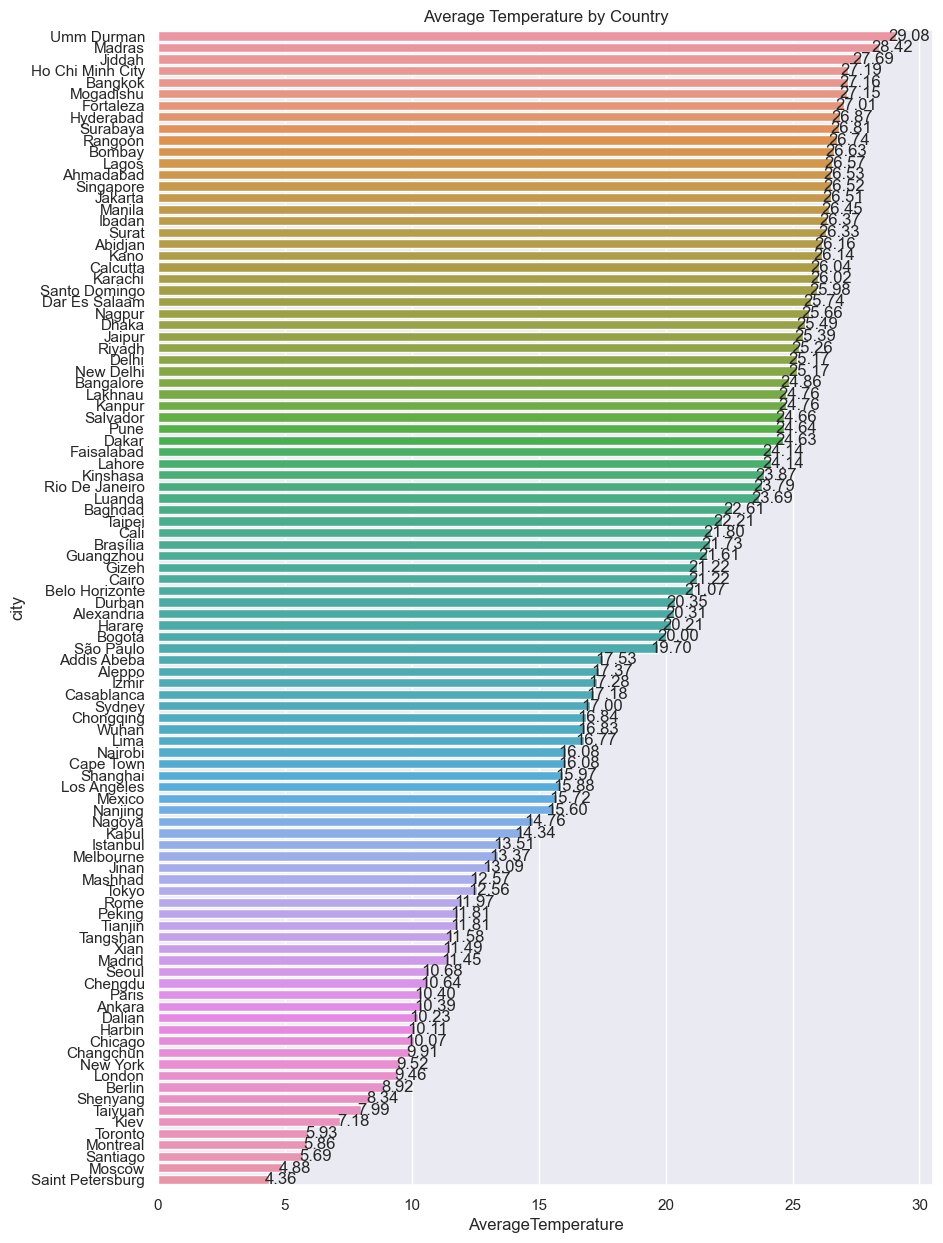

In [95]:
plt.figure(figsize=(10, 15))
sns.barplot(
    data=temp_by_cities,
    y='city', 
    x='AverageTemperature'  
)

plt.title('Average Temperature by Country')


for index, value in enumerate(temp_by_cities['AverageTemperature']):
    plt.text(
        x=value + 0.5, 
        y=index,  
        s=f"{value:.2f}", 
        va='center',  
        ha='center'  
    )

plt.show()

### One Hot encoding for categorical columns

In [96]:
dummies = pd.get_dummies(df4[['city']], drop_first=True)

dummies = dummies.astype(int)

In [97]:
dummies

,city_Addis Abeba,city_Ahmadabad,city_Aleppo,city_Alexandria,city_Ankara,city_Baghdad,city_Bangalore,city_Bangkok,city_Belo Horizonte,city_Berlin,...,city_São Paulo,city_Taipei,city_Taiyuan,city_Tangshan,city_Tianjin,city_Tokyo,city_Toronto,city_Umm Durman,city_Wuhan,city_Xian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
239172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
239173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
239174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
dummies.columns

Index(['city_Addis Abeba', 'city_Ahmadabad', 'city_Aleppo', 'city_Alexandria',
       'city_Ankara', 'city_Baghdad', 'city_Bangalore', 'city_Bangkok',
       'city_Belo Horizonte', 'city_Berlin', 'city_Bogotá', 'city_Bombay',
       'city_Brasília', 'city_Cairo', 'city_Calcutta', 'city_Cali',
       'city_Cape Town', 'city_Casablanca', 'city_Changchun', 'city_Chengdu',
       'city_Chicago', 'city_Chongqing', 'city_Dakar', 'city_Dalian',
       'city_Dar Es Salaam', 'city_Delhi', 'city_Dhaka', 'city_Durban',
       'city_Faisalabad', 'city_Fortaleza', 'city_Gizeh', 'city_Guangzhou',
       'city_Harare', 'city_Harbin', 'city_Ho Chi Minh City', 'city_Hyderabad',
       'city_Ibadan', 'city_Istanbul', 'city_Izmir', 'city_Jaipur',
       'city_Jakarta', 'city_Jiddah', 'city_Jinan', 'city_Kabul', 'city_Kano',
       'city_Kanpur', 'city_Karachi', 'city_Kiev', 'city_Kinshasa',
       'city_Lagos', 'city_Lahore', 'city_Lakhnau', 'city_Lima', 'city_London',
       'city_Los Angeles', 'city_Lu

In [99]:
dummies.columns = [col.replace('city_', '') for col in dummies.columns]
dummies.columns

Index(['Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria', 'Ankara', 'Baghdad',
       'Bangalore', 'Bangkok', 'Belo Horizonte', 'Berlin', 'Bogotá', 'Bombay',
       'Brasília', 'Cairo', 'Calcutta', 'Cali', 'Cape Town', 'Casablanca',
       'Changchun', 'Chengdu', 'Chicago', 'Chongqing', 'Dakar', 'Dalian',
       'Dar Es Salaam', 'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza',
       'Gizeh', 'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City',
       'Hyderabad', 'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta',
       'Jiddah', 'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev',
       'Kinshasa', 'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London',
       'Los Angeles', 'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad',
       'Melbourne', 'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya',
       'Nagpur', 'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris',
       'Peking', 'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome',
       'Saint Petersburg', 'Salvador', '

In [100]:
df6 = pd.concat([df4, dummies], axis='columns')
df6.head()

,AverageTemperature,city,year,month,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,26.704,Abidjan,1849,01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27.434,Abidjan,1849,02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.101,Abidjan,1849,03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.140,Abidjan,1849,04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.427,Abidjan,1849,05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df7 = df6.drop(['city'], axis='columns')
df7

,AverageTemperature,year,month,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,26.704,1849,01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27.434,1849,02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.101,1849,03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.140,1849,04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.427,1849,05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239171,12.563,2013,04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
239172,18.979,2013,05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
239173,23.522,2013,06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
239174,25.251,2013,07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Building the model 

In [102]:
df7.shape

(226554, 102)

In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df7['year'] = scaler.fit_transform(df7[['year']])


In [104]:
X = df7.drop(['AverageTemperature'], axis='columns')
X.head()

,year,month,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,0.392593,01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.392593,02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.392593,03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.392593,04,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.392593,05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
y = df7.AverageTemperature
y

0         26.704
1         27.434
2         28.101
3         26.140
4         25.427
           ...  
239171    12.563
239172    18.979
239173    23.522
239174    25.251
239175    24.528
Name: AverageTemperature, Length: 226554, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 39.86766438016825
R-squared: 0.5684255653003336


In [107]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X,y)

DecisionTreeRegressor()

In [108]:
dt_model.score(X_test, y_test)

1.0

In [109]:
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0
R-squared: 1.0


### Using K fold to test model accuracy

In [110]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.56688325, 0.56491032, 0.56610386, 0.56481176, 0.5691482 ])

In [111]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.97623741, 0.97640915, 0.97661148, 0.97666813, 0.9769831 ])

In [112]:
# from sklearn.model_selection import learning_curve, validation_curve

# def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
    
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
#     )
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     plt.grid()
    
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
#     plt.legend(loc="best")
#     return plt

# def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None, n_jobs=None):
#     train_scores, test_scores = validation_curve(
#         estimator, X, y, param_name=param_name, param_range=param_range, cv=cv, n_jobs=n_jobs
#     )
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     plt.title(title)
#     plt.xlabel(param_name)
#     plt.ylabel("Score")
#     plt.ylim(0.0, 1.1)
#     plt.plot(param_range, train_scores_mean, label="Training score", color="r")
#     plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
#     plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
#     plt.legend(loc="best")
#     return plt


# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import ShuffleSplit

# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# title = "Learning Curves (Decision Tree Regressor)"
# estimator = DecisionTreeRegressor(max_depth=5)
# plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
# plt.show()


# param_range = np.arange(1, 21)
# plot_validation_curve(DecisionTreeRegressor(), "Validation Curve with Decision Tree Regressor", X, y, param_name="max_depth", param_range=param_range, cv=cv, n_jobs=4)
# plt.show()


In [113]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted Values')
# plt.show()


Mean Squared Error: 2.1391292997726823
R-squared Score: 0.9768435514682892


In [114]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.566371,{'fit_intercept': True}
1,lasso,0.006799,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.976595,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### Prediction

In [115]:
# def predict_temp(city,year,month):    
#     city_index = np.where(X.columns==city)[0][0]

#     x = np.zeros(len(X.columns))
#     x[0] = year
#     x[1] = month
#     if city_index >= 0:
#         x[city_index] = 1

#     return model.predict([x])[0]


def predict_temp_range(city, year, month, tolerance=1):
    city_index = np.where(X.columns == city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = month
    if city_index >= 0:
        x[city_index] = 1

    predicted_temp = model.predict([x])[0]
    lower_bound = predicted_temp - tolerance
    upper_bound = predicted_temp + tolerance

    return lower_bound, upper_bound


In [116]:
lower, upper = predict_temp_range('Lagos', 2013, 1)
print(f"Temperature range for Lagos in May 1950: {lower}°C - {upper}°C")

Temperature range for Lagos in May 1950: 26.353°C - 28.353°C


C:\Users\Adekunle Habeeb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [117]:
lower, upper = predict_temp_range('Lagos', 2024, 2)
print(f"Temperature range for Lagos in February 2024: {lower}°C - {upper}°C")

Temperature range for Lagos in February 2024: 27.353°C - 29.353°C


C:\Users\Adekunle Habeeb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [118]:
predict_temp('Lagos', 2008, 8)

C:\Users\Adekunle Habeeb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


25.689

In [119]:
print(predict_temp('Lagos', 2008, 8))
print(predict_temp('Umm Durman', 2024, 6))
print(predict_temp('Madras', 2008, 2))
print(predict_temp('Singapore', 2008, 3))
print(predict_temp('Cape Town', 2008, 4))
print(predict_temp('Lagos', 2008, 5))
print(predict_temp('Lagos', 2008, 6))
print(predict_temp('Lagos', 2008, 7))
print(predict_temp('Lagos', 2008, 8))
print(predict_temp('Lagos', 2008, 9))
print(predict_temp('Lagos', 2008, 10))
print(predict_temp('Lagos', 2024, 6))
print(predict_temp('Lagos', 2024, 5))

C:\Users\Adekunle Habeeb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Adekunle Habeeb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Adekunle Habeeb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Adekunle Habeeb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Adekunle Habeeb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Adekun

25.689
34.516
27.093000000000004
28.053
17.224
27.904
27.059
26.506
25.689
26.242
26.722
27.059
27.904


### Exporting the model to a pickle file

In [209]:
import pickle
with open('Global_Temperature_of_Major_cities.pickle','wb') as f:
    pickle.dump(model,f)

### Export city and column information to a file that will be useful later on in our prediction application

In [210]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))